In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
p_list = [100, 500]
rng = np.random.default_rng(42)
X = rng.standard_normal(max(p_list) ** 2 * 2)

NOTA: AQÚ HAY QUE AJUSTAR PARA VARIOS VALORES DE C QUE AQUÍ LE LLAMA RHO 

DEJAR SIGMA2 = 1

In [65]:
marchenko_pastur_mu(x, p/n)

array([0.33333333, 0.08899133, 0.51971651, 0.48653043, 0.44426038,
       0.40806032, 0.37805309, 0.35298122, 0.33172367, 0.31343357,
       0.29748721, 0.28342246, 0.27089187, 0.25962984, 0.24943002,
       0.24012961, 0.2315984 , 0.22373091, 0.21644072, 0.20965627,
       0.20331775, 0.19737475, 0.19178441, 0.18651008, 0.18152017,
       0.17678729, 0.17228757, 0.16800009, 0.16390643, 0.15999027,
       0.15623715, 0.15263412, 0.14916961, 0.14583323, 0.14261557,
       0.13950817, 0.13650329, 0.13359394, 0.1307737 , 0.1280367 ,
       0.12537757, 0.12279136, 0.12027348, 0.11781971, 0.11542614,
       0.11308911, 0.11080524, 0.10857136, 0.1063845 , 0.10424187,
       0.10214087, 0.10007901, 0.09805397, 0.09606354, 0.09410561,
       0.09217817, 0.09027932, 0.08840721, 0.08656007, 0.0847362 ,
       0.08293395, 0.0811517 , 0.07938788, 0.07764096, 0.0759094 ,
       0.0741917 , 0.07248637, 0.0707919 , 0.06910677, 0.06742946,
       0.06575839, 0.06409197, 0.06242854, 0.06076635, 0.05910

In [63]:
x

array([0.        , 0.05088204, 0.10176409, 0.15264613, 0.20352818,
       0.25441022, 0.30529226, 0.35617431, 0.40705635, 0.4579384 ,
       0.50882044, 0.55970249, 0.61058453, 0.66146657, 0.71234862,
       0.76323066, 0.81411271, 0.86499475, 0.91587679, 0.96675884,
       1.01764088, 1.06852293, 1.11940497, 1.17028702, 1.22116906,
       1.2720511 , 1.32293315, 1.37381519, 1.42469724, 1.47557928,
       1.52646132, 1.57734337, 1.62822541, 1.67910746, 1.7299895 ,
       1.78087154, 1.83175359, 1.88263563, 1.93351768, 1.98439972,
       2.03528177, 2.08616381, 2.13704585, 2.1879279 , 2.23880994,
       2.28969199, 2.34057403, 2.39145607, 2.44233812, 2.49322016,
       2.54410221, 2.59498425, 2.6458663 , 2.69674834, 2.74763038,
       2.79851243, 2.84939447, 2.90027652, 2.95115856, 3.0020406 ,
       3.05292265, 3.10380469, 3.15468674, 3.20556878, 3.25645082,
       3.30733287, 3.35821491, 3.40909696, 3.459979  , 3.51086105,
       3.56174309, 3.61262513, 3.66350718, 3.71438922, 3.76527

In [67]:
aber

array([0.        , 0.06617842, 0.51974413, 0.48696067, 0.44478231,
       0.40860297, 0.37859399, 0.3535124 , 0.33224241, 0.31393926,
       0.29798014, 0.28390329, 0.27136139, 0.26008886, 0.24987933,
       0.24056995, 0.23203046, 0.22415533, 0.21685807, 0.21006708,
       0.2037225 , 0.19777389, 0.19217835, 0.1868992 , 0.18190481,
       0.17716778, 0.17266421, 0.16837316, 0.16427619, 0.16035697,
       0.15660101, 0.15299536, 0.14952845, 0.14618985, 0.14297017,
       0.13986092, 0.13685437, 0.1339435 , 0.13112191, 0.12838371,
       0.12572354, 0.12313641, 0.12061778, 0.11816339, 0.11576933,
       0.11343196, 0.11114788, 0.10891392, 0.10672712, 0.10458469,
       0.10248401, 0.10042263, 0.09839819, 0.0964085 , 0.09445146,
       0.09252506, 0.09062739, 0.08875662, 0.08691099, 0.08508879,
       0.08328838, 0.08150815, 0.07974655, 0.07800203, 0.0762731 ,
       0.07455825, 0.072856  , 0.07116486, 0.06948335, 0.06780994,
       0.06614309, 0.06448123, 0.06282272, 0.06116587, 0.05950

Text(0, 0.5, 'Densidad')

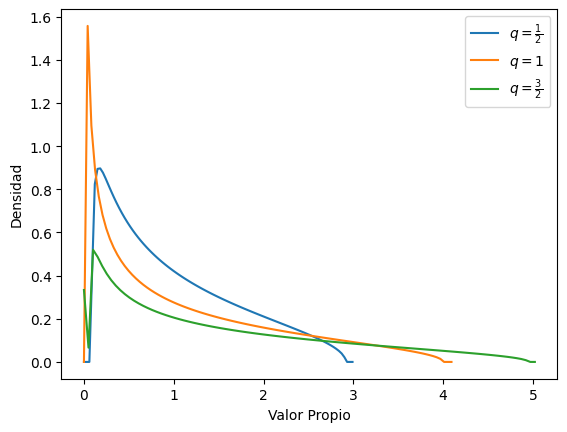

In [66]:
def marchenko_pastur_mu(x, rho, sigma2=1):
    x = np.atleast_1d(x).astype(float)
    rho_p = sigma2 * (1 + np.sqrt(rho)) ** 2
    rho_m = sigma2 * (1 - np.sqrt(rho)) ** 2
    mu = np.zeros_like(x)
    is_nonzero = (rho_m < x) & (x < rho_p)
    x_valid = x[is_nonzero]
    factor = 1 / (2 * np.pi * sigma2 * rho)
    mu[is_nonzero] = factor / x_valid
    mu[is_nonzero] *= np.sqrt((rho_p - x_valid) * (x_valid - rho_m))
    if rho > 1:
        mu[x == 0] = 1 - 1 / rho
    return mu

fig, ax = plt.subplots()



n, p = 2000, 1000
X = rng.standard_normal(p *n)
A = X.reshape(n, p)
Y = 1/n * A.T @ A
eigenvals, _ = np.linalg.eig(Y)
#ax.hist(eigenvals.real, bins=50, density=True, label="histogram")
x = np.linspace(0, np.max(eigenvals.real)+0.1 , 100)
ax.plot(x, marchenko_pastur_mu(x, rho=p/n), label=r'$q = \frac{1}{2}$')


n, p = 2000, 2000
X = rng.standard_normal(p *n)
A = X.reshape(n, p)
Y = 1/n * A.T @ A
eigenvals, _ = np.linalg.eig(Y)
#ax.hist(eigenvals.real, bins=50, density=True, label="histogram")
x = np.linspace(0, np.max(eigenvals.real)+0.1 , 100)
ax.plot(x, marchenko_pastur_mu(x, rho=p/n), label=r'$q = 1$')


n, p = 4000, 6000
X = rng.standard_normal(p *n)
A = X.reshape(n, p)
Y = 1/n * A.T @ A
eigenvals, _ = np.linalg.eig(Y)
#ax.hist(eigenvals.real, bins=50, density=True, label="histogram")
x = np.linspace(0, np.max(eigenvals.real)+0.1 , 100)
aber = marchenko_pastur_mu(x, rho=p/n)
aber[0] = 0
ax.plot(x, marchenko_pastur_mu(x, rho=p/n), label=r'$q = \frac{3}{2}$')

ax.legend()
ax.set_xlabel("Valor Propio")
ax.set_ylabel("Densidad")
#ax.set_title(r"Marchenko-Pastur Distribution for $T = 2000$, $N = 1000$, $q = \frac{1}{2}$");